# test data EDA

- train 데이터와 test 데이터 비교

In [31]:
import MySQLdb
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
import statsmodels as sm
import statsmodels.api

/home/kang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/kang/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/kang/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/kang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/kang/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-123>", line 2, in initialize
  File "/home/kang/anaconda3/lib/python3.6/site-packa

In [3]:
# write ubuntu test popular
db = MySQLdb.connect(
    "13.125.205.254",
    "user",
     "1111",
    "SPR",
    charset='utf8',
)

In [4]:
# SQL_QUERY = """
#     SELECT *
#     FROM spr_test_data;
# """
# curs = db.cursor()
# count = curs.execute(SQL_QUERY)
# rows = curs.fetchall()

# df = pd.read_sql(SQL_QUERY, db)

In [6]:
df.to_csv("test_by_wk.csv", index = False)

In [11]:
df = pd.read_csv("test_by_wk.csv", )

/home/kang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
del df["index"]

In [14]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01-TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NaN,02-PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NaN,03-UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03-UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03-UNIVERSITARIO


In [62]:
df.isnull().sum()

fecha_dato                    0
ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          5
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
ult_fec_cli_1t           927932
indrel_1mes                  23
tiprel_1mes                  23
indresi                       0
indext                        0
conyuemp                 929511
canal_entrada              2081
indfall                       0
tipodom                       0
cod_prov                   3996
nomprov                    3996
ind_actividad_cliente         0
renta                    227965
segmento                   2248
dtype: int64

## fecha_dato

In [16]:
df["fecha_dato"].value_counts()

2016-06-28    929615
Name: fecha_dato, dtype: int64

#### Comment
fecha_dato : 
- 6월 28일 데이터만 존재

## ncodpers

In [17]:
df["ncodpers"].value_counts()

18423      1
1382391    1
733232     1
772143     1
780331     1
778282     1
763939     1
768033     1
765984     1
673823     1
671774     1
682011     1
679962     1
686105     1
684056     1
657431     1
659476     1
704526     1
718857     1
698371     1
702465     1
1400830    1
1394685    1
1396732    1
1406971    1
1409018    1
1402873    1
735281     1
729138     1
725044     1
          ..
860942     1
983882     1
996172     1
971632     1
1026911    1
928623     1
926574     1
930668     1
920427     1
918378     1
924521     1
922472     1
942950     1
949093     1
940897     1
938848     1
1024862    1
998221     1
1031005    1
1018715    1
1016666    1
1022809    1
1020760    1
1043287    1
1041238    1
1045332    1
1035091    1
1037136    1
994127     1
26637      1
Name: ncodpers, Length: 929615, dtype: int64

#### Comment :
ncodpers :
- 중복없음

## ind_empleado

In [18]:
df["ind_empleado"].value_counts()

N    929096
B       218
F       152
A       148
S         1
Name: ind_empleado, dtype: int64

#### Comment 
ind_empleado : 
- train 데이터와 유사

In [24]:
df[df.columns[3]].value_counts()

ES    925619
FR       311
AR       288
GB       286
DE       281
US       231
CO       211
IT       179
RO       175
MX       156
BR       141
VE       136
EC       130
CH       124
BE        93
BO        93
PT        90
PY        87
CL        59
PE        54
NL        47
RU        45
CU        44
PL        38
SE        37
CN        33
UY        30
UA        29
AT        29
BG        28
       ...  
ET         2
TW         2
GW         2
CG         2
PH         2
BA         2
SL         1
GI         1
IS         1
MT         1
CD         1
MM         1
DJ         1
BM         1
TN         1
ML         1
BZ         1
TG         1
KZ         1
GE         1
CF         1
GH         1
GM         1
LB         1
LY         1
AL         1
KW         1
ZW         1
KH         1
LV         1
Name: pais_residencia, Length: 118, dtype: int64

#### Comment : 
ind_empleado :
- train 데이터와 유사

## sexo

In [25]:
df[df.columns[4]].value_counts()

V    504515
H    425095
Name: sexo, dtype: int64

#### Comment : 
sexo :
- V가 더 많음 -> train과 유사

## age

In [29]:
df[df.columns[5]].value_counts()

24     50706
23     49604
22     47674
21     46322
25     41429
26     26672
43     21592
20     21509
44     21242
45     21132
27     21095
42     20843
46     20450
41     20252
47     19285
48     18672
40     18368
28     17755
49     17365
39     16637
50     16086
29     15496
51     15253
38     15181
52     14416
37     14327
53     13630
30     13587
36     13214
54     12888
       ...  
98       376
9        338
8        281
99       261
100      246
7        239
6        232
101      197
5        191
102      165
103      151
4        132
104      120
3        114
105       90
106       72
107       52
2         47
108       38
109       26
110       20
111       17
112       16
113       10
116        7
114        6
127        1
117        1
118        1
164        1
Name: age, Length: 118, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]),
 <a list of 118 Text xticklabel objects>)

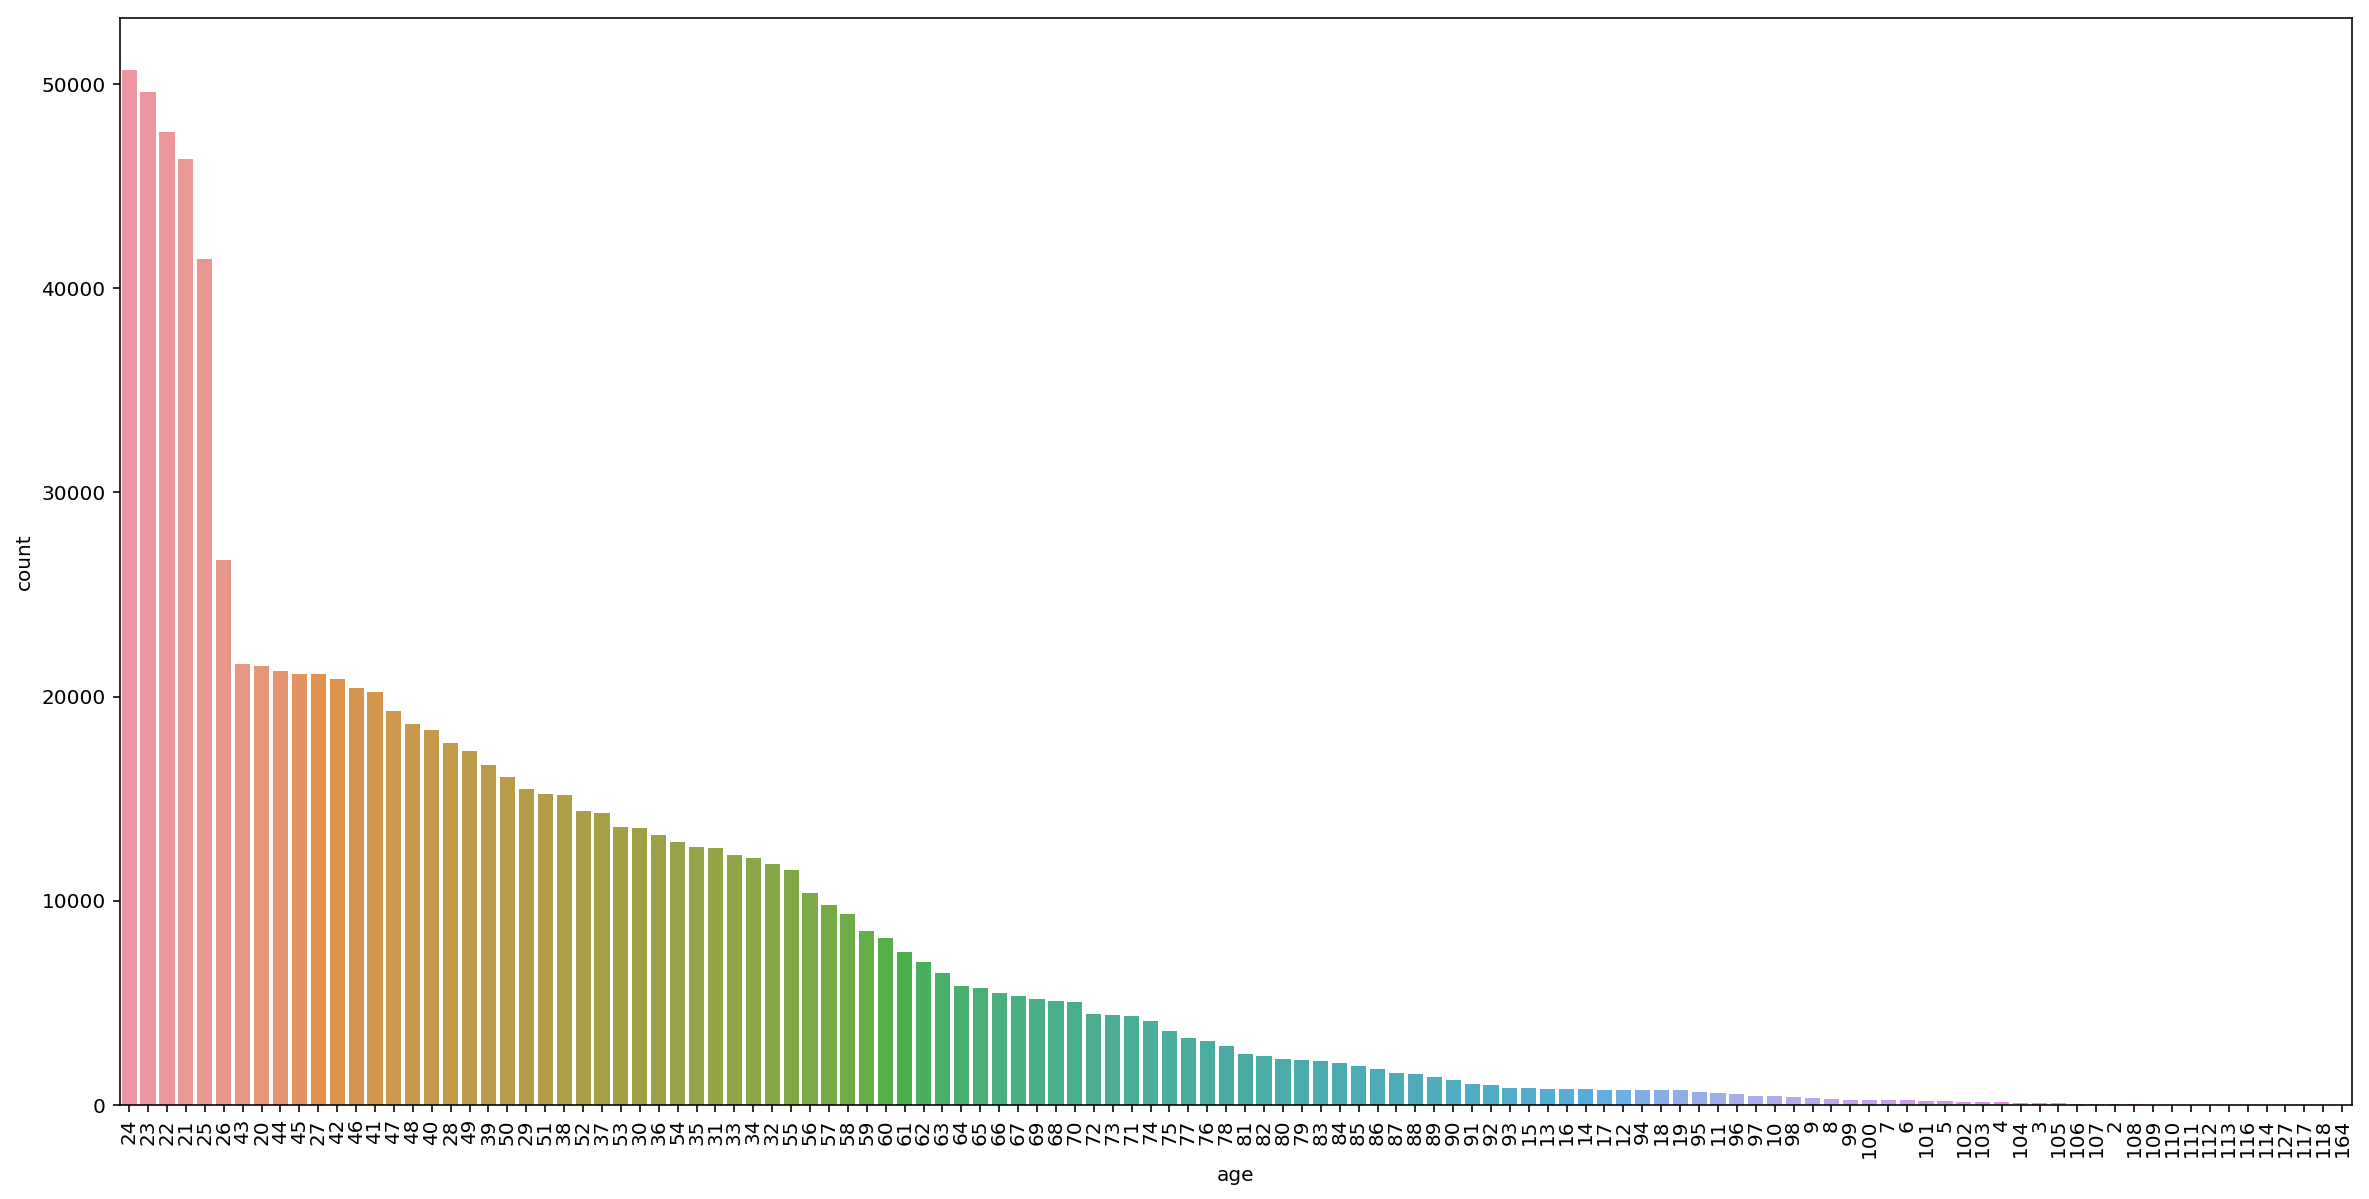

In [35]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='age', data=df, order=df['age'].value_counts().index)
plt.xticks(rotation=90)

#### Comment 
age : 
- train과 유사

## fecha_alta

In [37]:
df[df.columns[6]].value_counts()

2014-07-28    3421
2014-10-03    3355
2014-08-04    2787
2013-10-14    2633
2013-08-03    2013
2015-08-01    1826
2015-07-25    1773
2015-10-10    1728
2012-08-06    1594
2014-07-21    1577
2012-08-03    1537
2012-08-02    1514
2013-10-11    1509
2015-10-19    1457
2015-09-16    1436
2013-08-10    1431
2015-09-23    1418
2015-09-15    1403
2015-10-09    1399
2014-09-17    1396
2014-08-06    1393
2014-09-24    1388
2012-08-01    1383
2015-09-21    1374
2014-07-30    1364
2015-07-21    1354
2012-08-09    1346
2015-09-22    1345
2013-07-22    1337
2012-08-07    1335
              ... 
2011-08-28       1
2013-11-03       1
2010-12-08       1
1997-09-09       1
2011-09-18       1
1995-04-12       1
2012-04-29       1
1995-04-23       1
2013-01-26       1
2014-06-22       1
2014-09-06       1
2010-12-18       1
2011-04-22       1
2010-10-31       1
2013-01-01       1
2014-11-02       1
2013-09-21       1
2014-08-10       1
2013-06-09       1
2014-06-21       1
2013-05-11       1
1995-02-15  

#### Comment : 
fecha_alta : 
- train과 유사

## ind_nuevo

In [39]:
df[df.columns[7]].value_counts()

0    903726
1     25889
Name: ind_nuevo, dtype: int64

#### Comment : 
ind_nuevo : 
- 최근 6개월간 신규 가입자
- 0이 다수, train과 유사

## antiguedad

In [40]:
df[df.columns[8]].value_counts()

 8         26335
 32        23415
 9         22972
 20        21108
 11        20420
 44        18531
 21        17923
 56        16238
 23        15940
 34        15559
 19        15137
 55        14530
 43        13959
 7         13932
 46        13587
 47        13434
 45        13428
 31        13225
 33        12710
 57        12156
 35        11379
 22         9970
 10         9944
 58         9489
 54         9369
 18         8625
 59         7047
 5          6762
 175        6244
 4          6124
           ...  
 84          806
 230         800
 229         800
 225         772
 245         761
 78          760
 246         722
 240         711
 239         706
 85          702
 86          674
 226         668
 249         631
 243         604
 247         599
 214         542
 244         512
 241         504
 237         459
 252         443
 251         419
 238         325
 253         244
 250         191
 254         152
 0           129
 257         102
 255          

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

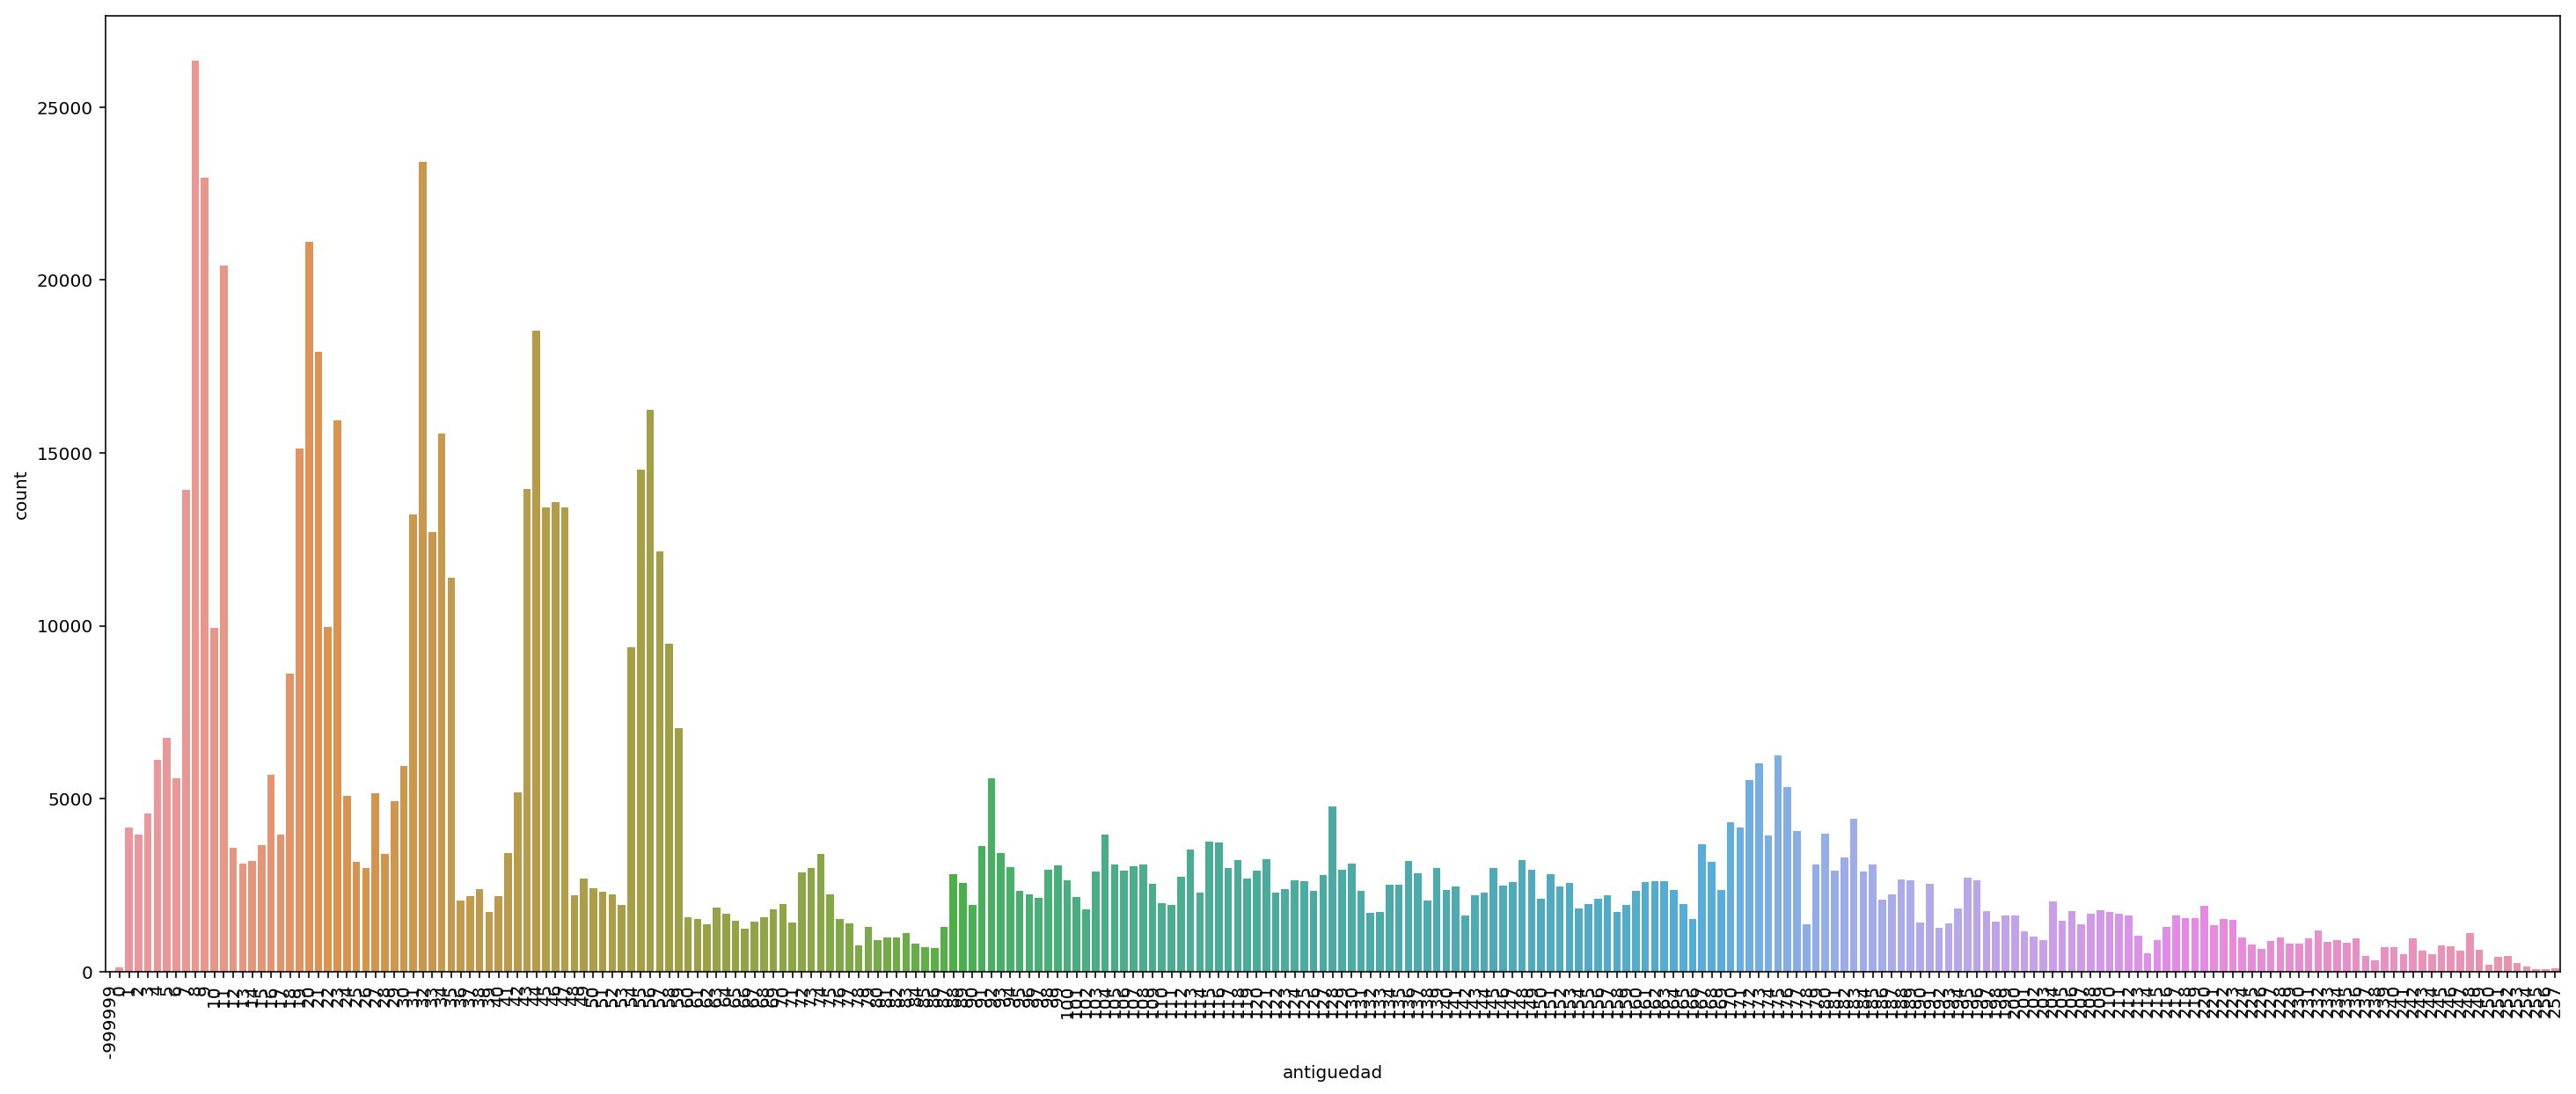

In [42]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='antiguedad', data=df)
plt.xticks(rotation=90)

#### Comment  
antiguedad : 
- 고객 연공서열
- train과 유사

## indrel

In [44]:
df[df.columns[9]].value_counts()

1     927932
99      1683
Name: indrel, dtype: int64

#### Comment  
indrel : 
- 주고객층 여부
- train과 유사


In [47]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento'],
      dtype='object')

## ult_fec_cli_1t

In [45]:
df[df.columns[10]].value_counts()

2016-06-01    138
2016-06-10    133
2016-06-03    110
2016-06-07    102
2016-06-06    101
2016-06-20     84
2016-06-13     84
2016-06-17     78
2016-06-15     78
2016-06-23     78
2016-06-14     76
2016-06-02     75
2016-06-09     75
2016-06-22     72
2016-06-21     70
2016-06-24     64
2016-06-16     62
2016-06-08     60
2016-06-27     58
2016-06-28     49
2016-06-29     36
Name: ult_fec_cli_1t, dtype: int64

In [49]:
df["ult_fec_cli_1t"].isnull().sum()

927932

#### Comment  
ult_fec_cli_1t :
- 주고객층이었던 마지막 날짜
- train과 유사, ** 대부분이 null **

## indrel_1mes

In [52]:
df[df.columns[11]].value_counts()

1.0    929565
3.0        27
Name: indrel_1mes, dtype: int64

#### Comment  
indrel_1mes :
- 고객 타입
- ** 1, 3만 존재, train은 1,2,3,4, P 전부 존재 **

## tiprel_1mes

In [54]:
df[df.columns[12]].value_counts()

I    535943
A    393622
P        27
Name: tiprel_1mes, dtype: int64

#### Comment  
tiprel_1mes :
- 월초 고객 타입
- ** R, N이 사라짐 **

## indresi

In [55]:
df[df.columns[13]].value_counts()

S    925620
N      3995
Name: indresi, dtype: int64

#### Comment  
indresi :
- train과 유사

## indext

In [56]:
df[df.columns[14]].value_counts()

N    883548
S     46067
Name: indext, dtype: int64

#### Comment  
indext :
- train과 유사

## conyuemp

In [57]:
df[df.columns[15]].value_counts()

N    103
S      1
Name: conyuemp, dtype: int64

#### Comment  
conyuemp :
- train과 유사, ** 대부분이 null **

## canal_entrada

In [58]:
df[df.columns[16]].value_counts()

KHE    251665
KAT    205833
KFC    200697
KHQ     74969
KHM     33384
KFA     25653
KHN     18131
KHK     16918
KHD      7390
RED      6328
KAS      5584
KAG      4663
KAY      4441
KAA      4295
KAB      4014
KAE      3293
KCC      3119
KBZ      3009
KFD      2951
KHL      2948
KAI      2428
KEY      2273
KAW      2206
007      2197
KAZ      2139
KAR      2136
KAF      1913
KCI      1777
KAJ      1670
013      1659
        ...  
KAU        15
KDH        13
KDN        13
KCJ        13
KCO        13
KCQ        12
KEE        11
KCP        10
KEQ        10
K00        10
KCR        10
KBE         9
KCT         9
KFB         7
KBX         6
KAV         6
KFV         5
KBN         5
KBP         5
KCX         5
KEM         4
KHA         3
KGU         2
KGC         2
KGN         1
025         1
KDI         1
KDB         1
KDL         1
KHR         1
Name: canal_entrada, Length: 162, dtype: int64

#### Comment  
canal_entrada :
- train과 유사

## indfall

In [60]:
df[df.columns[17]].value_counts()

N    927215
S      2400
Name: indfall, dtype: int64

#### Comment  
indfall :
- train과 유사

In [61]:
df[df.columns[18]].value_counts()

1    929615
Name: tipodom, dtype: int64